# basic

In [1]:
#!/usr/local/bin/python

import os, sys
import json
import numpy as np
import matplotlib.pyplot as plt
import chainer
from chainer import cuda
from matplotlib import animation
from optparse import OptionParser

from util.cmap_bipolar import bipolar
from simulator_monodomain import MonodomainSimulator
from elecpy import sim_generator

from matplotlib import animation, rc
from IPython.display import HTML

import time
import random
import h5py

%matplotlib inline

/opt/conda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## heterogeneous array

In [2]:
num = 0

while num < 100:
    r = random.randint(5, 30)
    x = random.randint(0, 200)
    y = random.randint(0, 200)
    heterogeneity = random.uniform(1.0, 1.5)

    # print(r, x, y, heterogeneity)
    
    substrate = np.ones((200, 200))
    
    for i in range(200):
        for j in range(200):
            if (i-x)*(i-x)+(j-y)*(j-y) < r*r:
                substrate[j][i] = heterogeneity
    
    np.save('/mnt/Omer/Project/11.DNNAblation/mask/20190725/%s.npy' % (num+1), substrate)

    num += 1

## set up parameters

In [2]:
# load sample parameter
with open ('temp/sim_params.json','r') as f:
    sim_params = json.load(f)

# modify parameters
sim_params['time']['end'] = 1000
sim_params['time']['udt'] = 0.005
sim_params['stimulation']['extracellular'] = []
sim_params['cell_type'] = 'luorudy'
sim_params['log']['path'] = '/mnt/Omer/Project/11.DNNAblation/SimulationResults/2D/20190726-1'
sim_params['log']['cnt'] = 1 / sim_params['time']['udt']
sim_params['restart'] = {}
sim_params['restart']['count'] = 0
sim_params['restart']['source'] = '/mnt/Omer/Project/11.DNNAblation/SimulationResults/2D/20180718-1/'

print json.dumps(sim_params, indent=4)

{
    "cell_type": "luorudy", 
    "log": {
        "path": "/mnt/Omer/Project/11.DNNAblation/SimulationResults/2D/20190726-1", 
        "cnt": 200.0
    }, 
    "stimulation": {
        "extracellular": [], 
        "membrane": []
    }, 
    "time": {
        "end": 1000, 
        "udt": 0.005
    }, 
    "geometory": {
        "width": 200, 
        "ds": 0.015, 
        "height": 200
    }, 
    "restart": {
        "count": 0, 
        "source": "/mnt/Omer/Project/11.DNNAblation/SimulationResults/2D/20180718-1/"
    }
}


## run with elecpy

In [3]:
g = sim_generator(sim_params)

out = []
while True:
    img = g.next()
    if img is False: break
    out.append(np.copy(img))

elecpy simulation start!
Stimulation settings ...done
Allocating data... ...done
Initializing data... ...done
Mask settings... ...done
Building PDE system ... ...done
Main loop start!
------------------1000.0/1000mselecpy done


## batchrun

In [ ]:
num = 0

while num < 10:
    
    # load sample parameter
    with open ('temp/sim_params.json','r') as f:
        sim_params = json.load(f)

    # modify parameters
    sim_params['time']['end'] = 1000
    sim_params['time']['udt'] = 0.005
    sim_params['stimulation']['extracellular'] = []
    sim_params['cell_type'] = 'luorudy'
    sim_params['mask']['c_brugada'] = '/mnt/Omer/Project/11.DNNAblation/mask/20190725/%s.npy' % (num+1)
    sim_params['log']['path'] = '/mnt/Omer/Project/11.DNNAblation/temp/20190729-%s' % (num+1)
    sim_params['log']['cnt'] = 1 / sim_params['time']['udt']
    sim_params['restart'] = {}
    sim_params['restart']['count'] = 0
    sim_params['restart']['source'] = '/mnt/Omer/Project/11.DNNAblation/SimulationResults/2D/20180726-1/'

    print json.dumps(sim_params, indent=4)
    
    g = sim_generator(sim_params)
    
    out = []
    while True:
        img = g.next()
        if img is False: break
        out.append(np.copy(img))
    
    num += 1

## run with monodomain

In [15]:
g = MonodomainSimulator(sim_params)

In [16]:
g.step()

<generator object step at 0x7f6bf03f5a00>

## 結果確認

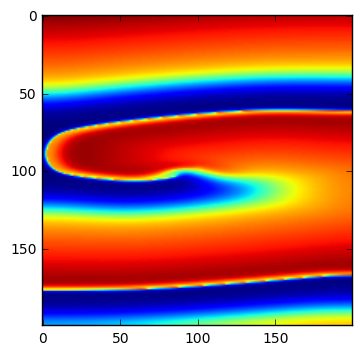

In [4]:
f = h5py.File('/mnt/Omer/Project/11.DNNAblation/SimulationResults/2D/20190726-1/out.h5', 'r')
plt.imshow(f['900.0']['v'].value.reshape((200,200)))